# Stage 1 Enhanced F1 Telemetry Analysis
**Goal:** Learn F1 telemetry, compare drivers, and make interactive visualizations.

## Skills Gained
- Python scripting & Jupyter Notebook
- Data visualization
- FastF1 API & motorsport analytics
- Clean documentation for portfolio

### Next Steps (Stage 3)
- still deciding on what needs to be added, stay tuned!

### 1️) Setup & Imports


In [8]:
# Libraries
import sys
import os
import fastf1
import fastf1.plotting as plotting
fastf1.Cache.enable_cache('C:/Users/Rishi/SRM/Projects/F1-Telemetry-Analysis/cache')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interact, widgets

# Enable caching
cache_path = "cache"
if not os.path.exists(cache_path):
    os.makedirs(cache_path)
fastf1.Cache.enable_cache(cache_path)

#prettify the plots
fastf1.plotting.setup_mpl()

#interactive widgets
%matplotlib inline

### 2) Load a Session

In [16]:
#Loading 2023 Quali of Spanish GP
session=fastf1.get_session(2023,'Spanish Grand Prix','Q')
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [15]:
#Loading 2023 Race of Monza GP
session=fastf1.get_session(2023, 'Monza', 'R')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

## 3) Interactive Telemetry


In [9]:
#First driver
def plot_driver_telemetry(driver='VER', channel='Speed'):
    #Pick a driver & fastest lap
    lap=session.laps.pick_drivers(driver).pick_fastest()
    #Get telemtry & add distance
    tel=lap.get_car_data().add_distance()

    #Plot
    plt.figure(figsize=(12,5))
    plt.plot(tel['Distance'], tel[channel], label=f"{driver} - {channel}")
    plt.xlabel("Distance (m)")
    plt.title(f"{driver} - {channel} Telemetry")
    plt.legend()
    plt.show()

#Widget
interact(plot_driver_telemetry, driver=['VER','LEC'],
         channel=['Speed','Throttle','Brake'])

#Second driver for side by side comparison
from ipywidgets import interact

#Comparision start
def compare_telemetry(driver1='VER', driver2='LEC', channel='Speed'):
    lap1=session.laps.pick_drivers(driver1).pick_fastest()
    lap2=session.laps.pick_drivers(driver2).pick_fastest()

#Each car distance
    tel1=lap1.get_car_data().add_distance()
    tel2=lap2.get_car_data().add_distance()

#Graph
    plt.figure(figsize=(12,5))
    plt.plot(tel1['Distance'], tel1[channel], label=f"{driver1}")
    plt.plot(tel2['Distance'], tel2[channel], label=f"{driver2}")
    plt.xlabel("Distance (m)")
    plt.ylabel(channel)
    plt.title(f"Telemetry Comparison: {driver1} v/s {driver2} ({channel}))")
    plt.legend()
    plt.show()

interact(compare_telemetry,
         driver1=['VER','LEC','HAM','ALO'],
         driver2=['VER','LEC','HAM','ALO'],
         channel=['Speed','Throttle','Brake'])

interactive(children=(Dropdown(description='driver', options=('VER', 'LEC'), value='VER'), Dropdown(descriptio…

interactive(children=(Dropdown(description='driver1', options=('VER', 'LEC', 'HAM', 'ALO'), value='VER'), Drop…

<function __main__.compare_telemetry(driver1='VER', driver2='LEC', channel='Speed')>

## 3.1) Additional Information

### 3.1.1) Sectors & Lap Times

In [10]:
laps=session.laps.pick_drivers('VER')
fastest=laps.pick_fastest()
print(fastest[['Sector1Time','Sector2Time','Sector3Time','LapTime']])

Sector1Time    0 days 00:00:19.363000
Sector2Time    0 days 00:00:35.111000
Sector3Time    0 days 00:00:19.756000
LapTime        0 days 00:01:14.230000
dtype: object


### 3.1.2) Fastest Lap on which tyre

In [15]:
print(fastest['Compound'])

MEDIUM


### 3.1.3) Lap Time Comparison
- Let the user pick two drivers and see their lap times plotted across the race.
- Shows consistency, degradation, and mistakes.

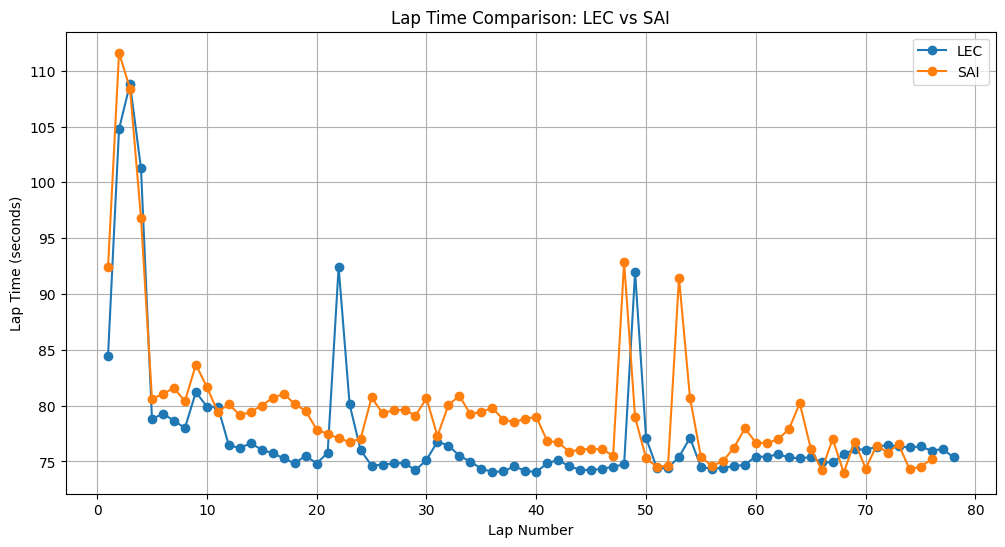

In [14]:
def compare_lap_times(driver1, driver2):
    laps_driver1 = session.laps.pick_drivers(driver1)
    laps_driver2 = session.laps.pick_drivers(driver2)

    plt.figure(figsize=(12,6))
    plt.plot(laps_driver1['LapNumber'], laps_driver1['LapTime'].dt.total_seconds(), label=driver1, marker='o')
    plt.plot(laps_driver2['LapNumber'], laps_driver2['LapTime'].dt.total_seconds(), label=driver2, marker='o')

    plt.xlabel("Lap Number")
    plt.ylabel("Lap Time (seconds)")
    plt.title(f"Lap Time Comparison: {driver1} vs {driver2}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example test
compare_lap_times('LEC', 'SAI')


### 3.1.4) Fastest Lap Highlight
- Highlight the single fastest lap of the session and show which driver set it, on what tyre.

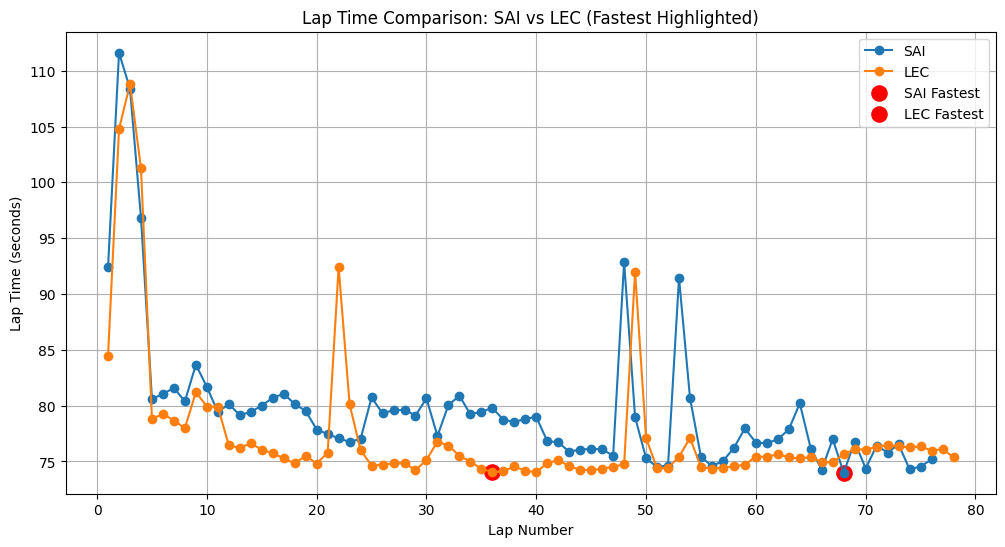

In [16]:
def compare_lap_times_wfastest(driver1, driver2):
    laps_driver1=session.laps.pick_drivers(driver1)
    laps_driver2=session.laps.pick_drivers(driver2)

    #Find fastest laps
    fastest1=laps_driver1.loc[laps_driver1['LapTime'].idxmin()] #idxmin is index minimum
    fastest2=laps_driver2.loc[laps_driver2['LapTime'].idxmin()]

    plt.figure(figsize=(12,6))
    plt.plot(laps_driver1['LapNumber'], laps_driver1['LapTime'].dt.total_seconds(), label=driver1, marker='o')
    plt.plot(laps_driver2['LapNumber'], laps_driver2['LapTime'].dt.total_seconds(), label=driver2, marker='o')

    #Highlight fastest laps
    plt.scatter(fastest1['LapNumber'], fastest1['LapTime'].total_seconds(), color='red', s=120, label=f"{driver1} Fastest")
    plt.scatter(fastest2['LapNumber'], fastest2['LapTime'].total_seconds(), color='red', s=120, label=f"{driver2} Fastest")

    #Graph
    plt.xlabel("Lap Number")
    plt.ylabel("Lap Time (seconds)")
    plt.title(f"Lap Time Comparison: {driver1} vs {driver2} (Fastest Highlighted)")
    plt.legend()
    plt.grid(True)
    plt.show()

#Eggsample
compare_lap_times_wfastest('SAI','LEC')

### 3.1.5) Gap to Leader Plot
- A graph showing how far behind each driver is from the race leader across laps.
- Helps visualize race dominance or fights.

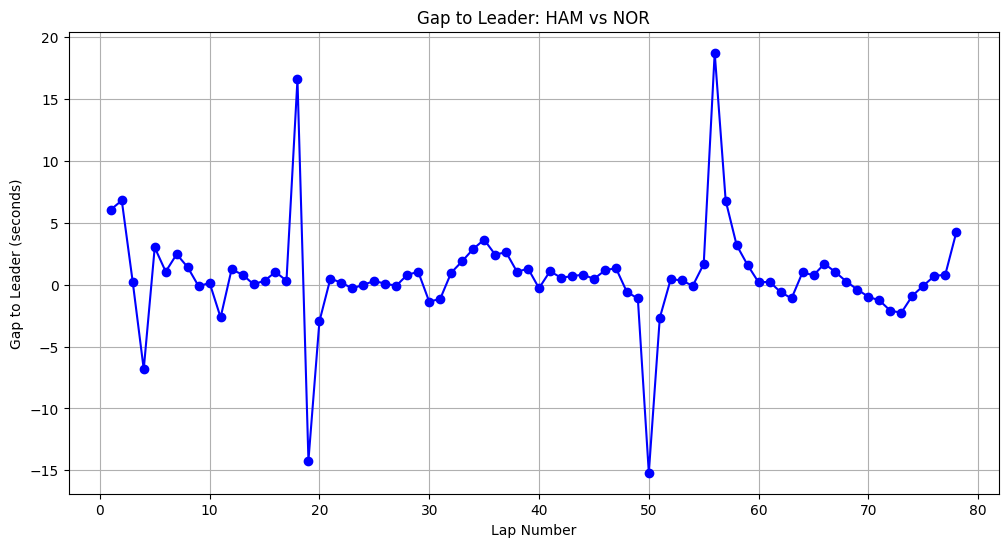

In [17]:
def plot_gap_to_leader(driver):
    # Pick laps for the driver (updated method)
    driver_laps = session.laps.pick_drivers(driver)
    
    # Pick leader laps (usually the first driver in session results)
    leader = session.results['Abbreviation'].iloc[0]  # leader's code by position
    leader_laps = session.laps.pick_drivers(leader)


    # Merge laps on LapNumber to compute gap
    merged = driver_laps.merge(
        leader_laps[['LapNumber','LapTime']],
        on='LapNumber',
        suffixes=('', '_Leader')
    )

    # Calculate gap in seconds
    merged['GapToLeader'] = (merged['LapTime'] - merged['LapTime_Leader']).dt.total_seconds()

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(merged['LapNumber'], merged['GapToLeader'], marker='o', color='blue')
    plt.xlabel("Lap Number")
    plt.ylabel("Gap to Leader (seconds)")
    plt.title(f"Gap to Leader: {driver} vs {leader}")
    plt.grid(True)
    plt.show()
    
# Example
plot_gap_to_leader('HAM')

### 3.1.6) Interactive "Pick a Driver"
- Widget lets user choose a driver, then prints:
- Their total pit stops
- Average lap time
- Best lap time
- Stint lengths

In [18]:
def driver_summary(driver):
    # Pick laps for this driver
    laps_driver = session.laps.pick_drivers(driver)
    
    if laps_driver.empty:
        print(f"No laps found for selected {driver}")
        return

    # Total pit stops
    total_pitstops = laps_driver['PitOutTime'].count()

    # Average lap time
    avg_lap = laps_driver['LapTime'].mean()

    # Best lap time
    best_lap = laps_driver['LapTime'].min()

    # Stints (laps in b/w pitstops)
    pit_laps = laps_driver[laps_driver['PitOutTime'].notna()]['LapNumber'].tolist()
    stints = []
    start = 1
    for pit_lap in pit_laps:
        stints.append((start, pit_lap))
        start = pit_lap + 1
    # Last stint till end of race
    stints.append((start, laps_driver['LapNumber'].max()))

    # Display info
    print(f"Driver: {driver}")
    print(f"Total Pit Stops: {total_pitstops}")
    print(f"Average Lap Time: {avg_lap}")
    print(f"Best Lap Time: {best_lap}")
    print(f"Stint lengths (start lap → end lap): {stints}")

    # Plot stints horizontally with F1 TV-style colors
    plt.figure(figsize=(12,1.5))
    colors = ['#ff6666','#ffd966','#a0a0a0','#00cc66','#3399ff']  # Tyre-like colors

    for i, stint in enumerate(stints):
        plt.barh(driver, width=stint[1]-stint[0]+1, left=stint[0],
                 color=colors[i % len(colors)], edgecolor='k', height=0.6)
        # Add simple texts showing stint start → end
        mid = (stint[0] + stint[1]) / 2
        plt.text(mid, 0, f"{stint[0]}→{stint[1]}", color='k', ha='center', va='center', fontsize=9)

    plt.xlabel("Lap Number")
    plt.title(f"{driver} Stint Overview (F1 TV-style)")
    plt.xlim(0, laps_driver['LapNumber'].max() + 1)
    plt.show()

# Interactive widget
driver_list = session.laps['Driver'].unique()
interact(driver_summary, driver=driver_list)


interactive(children=(Dropdown(description='driver', options=('VER', 'GAS', 'ANT', 'ALO', 'LEC', 'STR', 'TSU',…

<function __main__.driver_summary(driver)>

### 3.1.7) Sector Time Comparison
- Compare two drivers' sector 1,2,3 times.
- Shows where one gains/loses time.

In [19]:
def compare_sector_times(driver1, driver2):
    #Pick fastest lap for each driver
    lap1=session.laps.pick_drivers(driver1).pick_fastest()
    lap2=session.laps.pick_drivers(driver2).pick_fastest()

    if lap1 is None or lap2 is None:
        print("No laps found for one of the drivers")
        return

    sectors=['Sector1Time','Sector2Time','Sector3Time']

    # sector time to seconds
    sec1_times = [lap1[sec].total_seconds() for sec in sectors]
    sec2_times = [lap2[sec].total_seconds() for sec in sectors]

    x=range(1,4) #sector number 1,2,3

    #plot sector times
    for i in range(3):
        if sec1_times[i] < sec2_times[i]:
            plt.scatter(x[i], sec1_times[i], color='green', s=120, label='Fastest Sector' if i==0 else "")
        else:
            plt.scatter(x[i], sec2_times[i], color='green', s=120, label='Fastest Sector' if i==0 else "")


    plt.xticks(x, ['S1','S2','S3'])
    plt.ylabel("Time (seconds)")
    plt.title(f"Sector Comparison: {driver1} v/s {driver2} (Fastest highlighted)")
    plt.legend()
    plt.grid(True)
    plt.show()

# interactive widget
driver_list=session.laps['Driver'].unique()
interact(compare_sector_times, driver1=driver_list, driver2=driver_list)

interactive(children=(Dropdown(description='driver1', options=('VER', 'GAS', 'ANT', 'ALO', 'LEC', 'STR', 'TSU'…

<function __main__.compare_sector_times(driver1, driver2)>

### 3.1.8) Speed Trap Insights
- Extract the top speed (usually at the speed trap) per driver.
- Users can see who was fastest in a straight line.

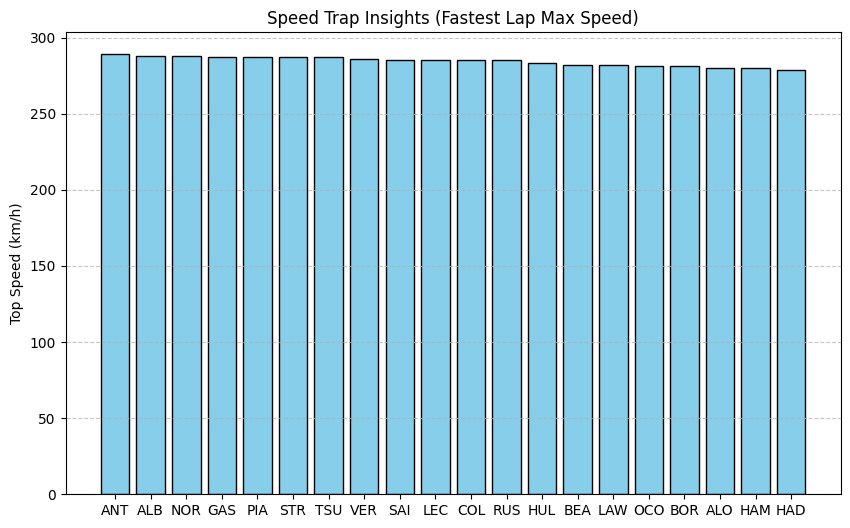

,Driver,TopSpeed
2,ANT,289.0
7,ALB,288.0
11,NOR,288.0
1,GAS,287.0
18,PIA,287.0
5,STR,287.0
6,TSU,287.0
0,VER,286.0
15,SAI,285.0
4,LEC,285.0


In [20]:
def speed_trap_insights():
    drivers = session.laps['Driver'].unique() # all driver laps
    top_speeds = []

    for driver in drivers:
        laps = session.laps.pick_drivers(driver)
        if laps.empty:
            continue

        try:
            # Get telemetry for fastest lap
            fastest_lap = laps.pick_fastest()
            tel = fastest_lap.get_car_data()

            if tel.empty or 'Speed' not in tel:
                continue

            # Max speed during that lap (proxy for speed trap)
            max_speed = tel['Speed'].max()
            top_speeds.append((driver, max_speed))
        except Exception as e:
            print(f"No telemetry data for {driver} ({e})")

    if not top_speeds:
        print("⚠️ No speed trap/telemetry data available for this session.")
        return

    # Put into DataFrame
    df = pd.DataFrame(top_speeds, columns=['Driver', 'TopSpeed']).sort_values(by='TopSpeed', ascending=False)

    # Plot
    plt.figure(figsize=(10,6))
    plt.bar(df['Driver'], df['TopSpeed'], color='skyblue', edgecolor='k')
    plt.ylabel("Top Speed (km/h)")
    plt.title("Speed Trap Insights (Fastest Lap Max Speed)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return df

# Run
speed_trap_insights()


### 3.1.9) Position Change Graph
- Show how driver positions evolved across the race (like an f1 brodcast chart).

In [7]:
fastf1.Cache.clear_cache()  # Clears all cached data from previous sessions, start fresh like new brain

session = fastf1.get_session(2025, 'Monaco', 'R')  # Get race session: 2025 year, Monaco GP, Race session

session.load()  # Load all lap and telemetry data into memory, so we can use it

print(session.laps[['Driver', 'LapNumber', 'Position']].head(10))  # Show first 10 rows of important lap info, check if data loaded

# Define your own team-color dictionary
TEAM_COLORS = {
    'Red Bull Racing': '#0600EF',  # Blue for Red Bull
    'Mercedes': '#00D2BE',         # Teal for Merc
    'Ferrari': '#DC0000',          # Red for Ferrari
    'McLaren': '#FF8700',          # Orange for McLaren
    'Alpine': '#0090FF',           # Blue for Alpine
    'Aston Martin': '#006F62',     # Green for Aston
    'Williams': '#005AFF',         # Blue for Williams
    'Haas': '#808080',             # Grey for Haas
    'AlphaTauri': '#4E7C9B',       # Dark Blue for AlphaTauri
    # Add more as needed
}

def position_change_graph(selected_drivers=None, selected_team=None):
    laps = session.laps  # take laps data from session, this is our main info
    if laps.empty:
        print("ERROR: No lap data available!")  # if nothing loaded, warn caveman
        return

    pos_data = laps.pivot(index='LapNumber', columns='Driver', values='Position')  
    # make table: rows = laps, columns = drivers, values = position, like big grid

    if selected_team and selected_team != "All Teams":  # if user picked a team
        team_drivers = session.results.query("TeamName == @selected_team")['Abbreviation'].tolist()
        # get driver codes for that team, like mini tribe
        pos_data = pos_data[team_drivers]  # filter grid for only these drivers
    elif selected_drivers:  # if user picked specific drivers
        pos_data = pos_data[list(selected_drivers)]  # filter grid for those drivers

    plt.figure(figsize=(12, 6))  # make big canvas for plotting

    for driver in pos_data.columns:  # for each driver in our filtered grid
        if pos_data[driver].isnull().all():
            print(f"No numeric data for {driver}, skipping")  # skip driver if all data missing
            continue
        team_name = session.get_driver(driver)['TeamName']  # get team name of driver
        color = TEAM_COLORS.get(team_name, 'black')  # pick team color, black if unknown
        label = f"{driver} - {team_name}"  # make label like "HAM - Mercedes"
        plt.plot(pos_data.index, pos_data[driver], label=label, lw=2, color=color)  
        # draw line on graph: x=laps, y=position, color=team color

    plt.gca().invert_yaxis()  # flip y-axis so P1 is on top, humans read top=good
    plt.xlabel("Lap Number")  # x-axis title
    plt.ylabel("Driver Position")  # y-axis title
    plt.title("Position Change Graph (Drivers & Teams)")  # main title
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # show legend outside plot
    plt.grid(True, linestyle='--', alpha=0.5)  # draw faint grid for eye
    plt.tight_layout()  # make plot not cut off edges
    plt.show()  # show caveman magic graph

# widgets
all_drivers = session.laps['Driver'].unique().tolist()  # list of all drivers in race
all_teams = ["All Teams"] + session.results['TeamName'].unique().tolist()  # all teams + option for all

driver_selector = widgets.SelectMultiple(
    options=all_drivers,  # show all drivers
    value=all_drivers,    # default select all
    description="Drivers", 
    disabled=False
)

team_selector = widgets.Dropdown(
    options=all_teams,  # show all teams
    value="All Teams",   # default select all
    description="Team",
    disabled=False
)

# link widgets with function
interact(position_change_graph, selected_drivers=driver_selector, selected_team=team_selector)  
# when user change dropdown or multi-select, run function and redraw graph

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

  Driver  LapNumber  Position
0    VER        1.0       4.0
1    VER        2.0       4.0
2    VER        3.0       4.0
3    VER        4.0       4.0
4    VER        5.0       4.0
5    VER        6.0       4.0
6    VER        7.0       4.0
7    VER        8.0       4.0
8    VER        9.0       4.0
9    VER       10.0       4.0


interactive(children=(SelectMultiple(description='Drivers', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

<function __main__.position_change_graph(selected_drivers=None, selected_team=None)>

### 3.1.10) Export Results
- Add a function to save chosen plots as PNGs or CSV summaries 
- so users can share outside Jupyter.

## 4) Skills Learned
- Python, Jupyter
- FastF1 and Telemetry
- Data Visualization
- Portfolio-ready projects